In [ ]:

#Librerías
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from google.colab import drive
 


import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
articulos = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/articles.csv",index_col=0)
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",index_col=0)
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",index_col=0)
usuarios_test=pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/users_test.csv",index_col=0)

In [ ]:
images_dir = '/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/images_rescaled'

# Articulos

1.   article_id: Id del articulo
2. product_code: Codigo articulo
3.   prod_name: Nombre articulo
4. product_type_no: Numero del tipo de articulo
5. prod_name: Nombre articulo
6. product_type_no: Numero del tipo de articulo 
7. product_type_name: Nombre del tipo de artículo
8. product_group_name: Nombre del grupo del artículo
9. graphical_appearance_no: Numero apariencia grafica 
10. graphical_appearance_name: 	Nombre apariencia grafica
11. colour_group_code: Codigo del grupo de color de item	
12. colour_group_name:	Nombre del grupo de color de item
13. department_no:	Numero departamento
14. department_name: Nombre departamento
15. section_no:	Numero seccion
16. garment_group_name:	Nombre del grupo del item
17. detail_desc:Descripcion item




In [ ]:
articulos.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,department_no,department_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,1339,Clean Lingerie,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,1339,Clean Lingerie,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# Numero de registros únicos en cada columna
for col in articulos.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articulos[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 35940
n of unique product_type_name: 125
n of unique product_group_name: 18
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique department_name: 245
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 33900


In [ ]:
#Productos dentro de cada categoría de grupo
pd.options.display.max_rows = None
articulos.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                3
                       Alice band                     5
                       Baby Bib                       3
                       Bag                          978
                       Beanie                        29
                       Belt                         367
                       Bracelet                     119
                       Braces                         3
                       Bucket hat                     5
                       Cap                           11
                       Cap/peaked                   301
                       Dog Wear                      20
                       Earring                      950
                       Earrings                      11
                       Felt hat                       8
                       Giftbox                        9
                       Gloves                       214


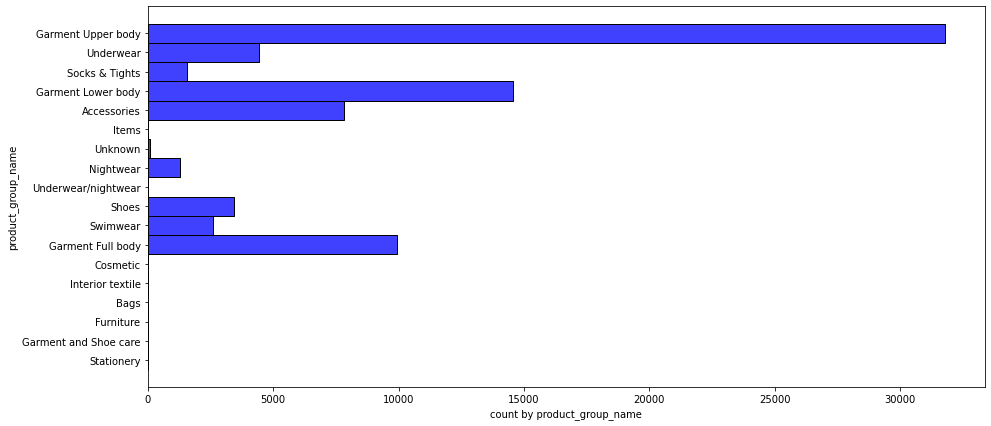

In [ ]:
#Categoría de productos (product_group_name)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='product_group_name', color='blue')
ax.set_xlabel('count by product_group_name')
ax.set_ylabel('product_group_name')
plt.show()

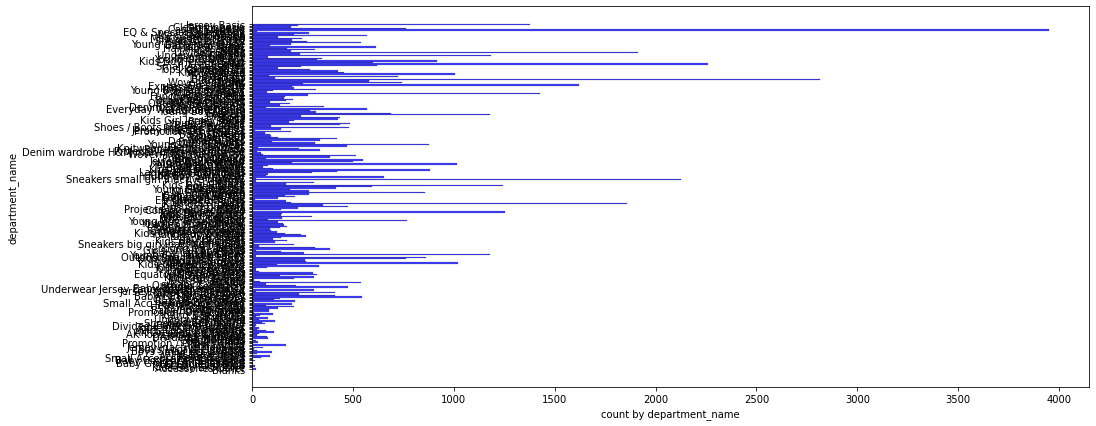

In [ ]:
#Departamento al que pertenece producto (department_name)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='department_name', color='blue')
ax.set_xlabel('count by department_name')
ax.set_ylabel('department_name')
plt.show()

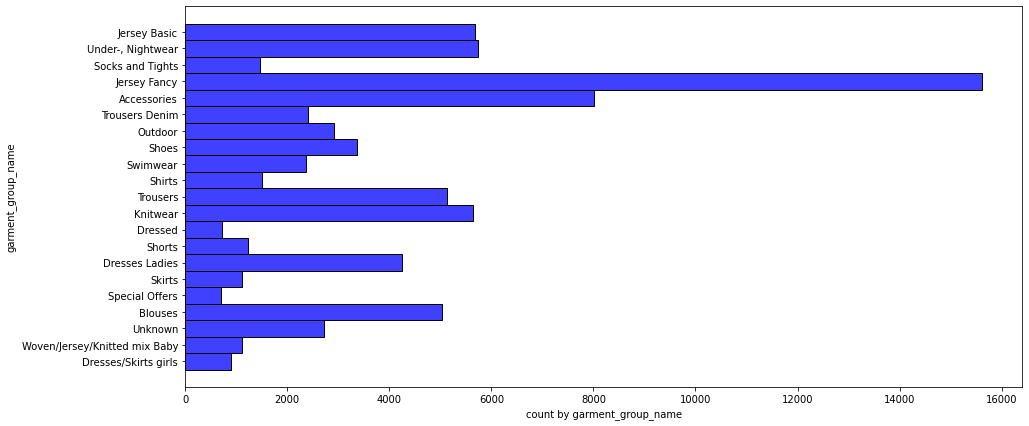

In [ ]:
#Nombre del grupo del producto
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='garment_group_name', color='blue')
ax.set_xlabel('count by garment_group_name')
ax.set_ylabel('garment_group_name')
plt.show()

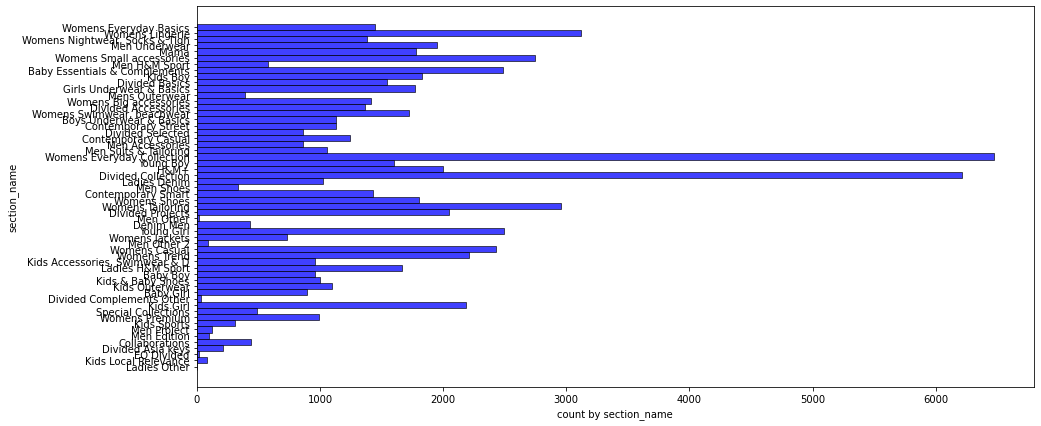

In [ ]:
#Tipo de productos
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='section_name', color='blue')
ax.set_xlabel('count by section_name')
ax.set_ylabel('section_name')
plt.show()

# Clientes

1. customer_id: id del usuario
2. club_member_status: estado de su membresía
3. age: edad
4. postal_code: codigo postal


In [ ]:
pd.options.display.max_rows = 50
clientes.head


<bound method NDFrame.head of                                              customer_id club_member_status  \
0      000226b9ea81019249060b376b516f821a80e9b24f89a7...             ACTIVE   
1      000303d20b953d06dcf8c6db2d05616383a88ac84bf054...             ACTIVE   
2      0003e7b27d3dd2295e609bcc017e96a05f322cd25fdaa7...             ACTIVE   
3      000416152a81973bebab23142bd5dd6ebd85c8c5e2d63e...             ACTIVE   
4      000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...             ACTIVE   
...                                                  ...                ...   
44995  fff871bf24b40fd1290215414d760afaa69bb164d2b970...             ACTIVE   
44996  fff928730466cde2f16c50c0921c96279b7386f9433756...             ACTIVE   
44997  fff9e830d0c21559ef730da1023cadb4c141597ad1e366...             ACTIVE   
44998  fffb0ca7aca4f24df1b00a578d5b692ed7f83ffec7c37d...             ACTIVE   
44999  fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...             ACTIVE   

        age          

In [ ]:
#No hay Id de cleintes repetidos
clientes.shape[0] - clientes['customer_id'].nunique()

0

In [ ]:
#Agrupamiento por codigo postal
codigo_postal_unico = clientes.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
codigo_postal_unico

,postal_code,customer_id,club_member_status,age
6690,2c29ae653a9282cce4151bd87643c907644e09541abc28...,1975,1933,1930
31274,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,8,8,8
19019,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,8,8,8
13903,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,7,7,7
26782,af12619e8d7c308050b242b86d4b3e5ce22b49c077c098...,7,7,7
...,...,...,...,...
13650,59d2c38cbcf100d965bcbca2cfd29efa098b40d9fe2253...,1,1,1
13651,59d6c7e1a2d9e994ef6ed6871a633a11b22bdb84ba0720...,1,1,1
13652,59d70d6e3eafc107ca7da37ae4b6a3c3b1930508c689c6...,1,1,1
13653,59d9bac227acf5ce44f60f361d941ee7feddd1bce390f2...,1,1,1


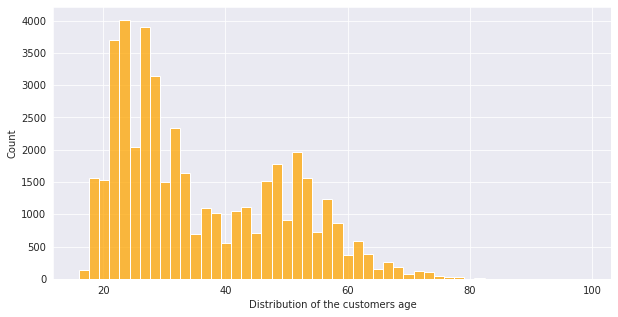

In [ ]:
#Distribución edad
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=clientes, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution de edad de clientes')
plt.show()

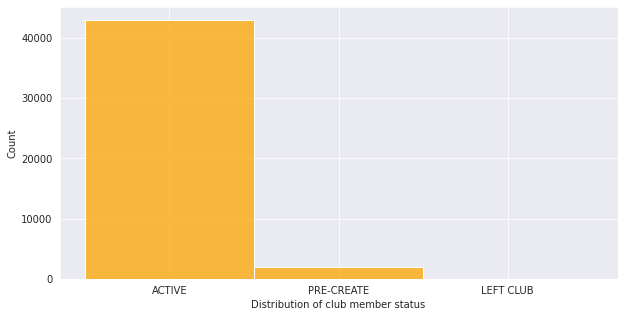

In [ ]:
#Status de membresía
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=clientes, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

# Transacciones

1. customer_id: id del usuario
2. article_id: el id del artículo
3. t_dat: la fecha de la transacción
4. price: el precio del articulo
5. sales_channel_id: Id del canal de venta

In [ ]:
pd.options.display.max_rows = 50
transacciones.head

<bound method NDFrame.head of               t_dat                                        customer_id  \
0        2018-11-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
1        2018-11-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
2        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
3        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
4        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
...             ...                                                ...   
1318496  2019-09-10  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318497  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318498  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318499  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318500  2019-09-22  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   

         article_id     price  sales_channel_id  
0         655265001  0.025407  

In [ ]:
#Trabajo imágenes
def getImagePaths(path):
    """
    Function to Combine Directory Path with individual Image Paths
    
    parameters: path(string) - Path of directory
    returns: image_names(string) - Full Image Path
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image

def load_data():
    output=[]
    output=getImagePaths(images_dir)[:10000]
    return output

In [ ]:
#Definición modelo y extracción de features
def model():
    model=ResNet50(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

In [ ]:
# Encontrar imagen similar a través de vecinos cercanos y similaridad coseno

def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

1/1 [==============================] - 0s 24ms/step


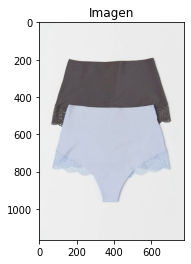

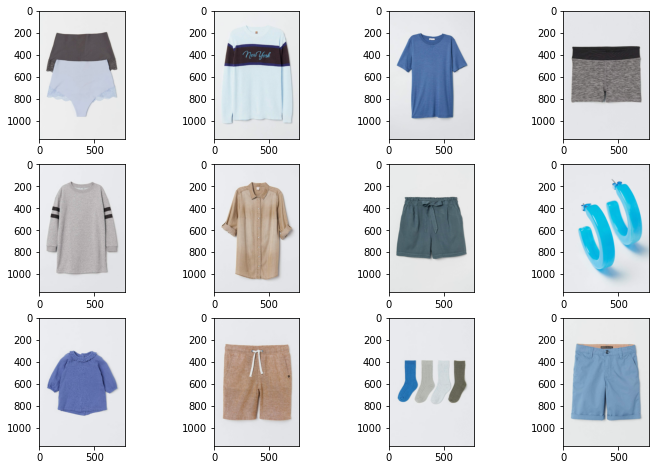

In [ ]:
def input_show(data):
    plt.title("Imagen")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

def main():  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:999]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[200]))
    input_show(cv2.imread(output[200]))
    show_result(output,result)
  

if __name__=='__main__':
    main()

In [ ]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # remove this case in advance
    # if not actual:
    #     return 0.0

    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
#Modelo ALS

from google.colab import data_table

data_table.enable_dataframe_formatter()


'''
articulos = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/articles.csv",index_col=0)
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",index_col=0)
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",index_col=0)
usuarios_test=pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/users_test.csv",index_col=0)
'''
%time
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",sep=',')
transacciones.head(10)



CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 103 µs


,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,0,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,655265001,0.025407,2
1,1,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,537688014,0.050831,2
2,2,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,698877002,0.042356,2
3,3,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,382127027,0.032186,2
4,4,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,610776001,0.008458,2
5,5,2019-05-17,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,647826001,0.016932,2
6,6,2019-10-03,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,754697001,0.017610,2
7,7,2019-10-03,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,754697001,0.017610,2
8,8,2019-09-03,1a1563c28f0d8781ad87f76e0a5af0485003e350f541dd...,801673004,0.016932,2
9,9,2019-09-03,1a1563c28f0d8781ad87f76e0a5af0485003e350f541dd...,448509001,0.042356,2


In [ ]:
#Veremos columnas que se usarán
columnas_transacciones=['customer_id', 'article_id', 'price']
transacciones=transacciones[columnas_transacciones]

#Si cliente compra mismo items se suma 1
transacciones.loc[:,"count"]=1



/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
transacciones.describe()

,article_id,price,count
count,1.318501e+06,1.318501e+06,1318501.0
mean,6.840127e+08,2.803561e-02,1.0
std,1.288764e+08,1.953588e-02,0.0
min,1.087750e+08,1.525424e-04,1.0
25%,6.244860e+08,1.574576e-02,1.0
50%,7.047560e+08,2.540678e-02,1.0
75%,7.664400e+08,3.388136e-02,1.0
max,9.481520e+08,5.915254e-01,1.0


In [ ]:
#como precio subordinado a articulo
transacciones=transacciones.groupby(['customer_id','article_id'], as_index=False).sum()




In [ ]:
transacciones.describe()

,article_id,price,count
count,1.125920e+06,1.125920e+06,1.125920e+06
mean,6.856343e+08,3.283092e-02,1.171043e+00
std,1.259046e+08,2.998607e-02,5.705251e-01
min,1.087750e+08,1.525424e-04,1.000000e+00
25%,6.261680e+08,1.693220e-02,1.000000e+00
50%,7.048740e+08,2.540678e-02,1.000000e+00
75%,7.664020e+08,4.066102e-02,1.000000e+00
max,9.481520e+08,2.532203e+00,1.660000e+02


In [ ]:
#Se buscarán usuarios asi como artículos

cliente=transacciones['customer_id'].unique()
articulo=transacciones['article_id'].unique()


print(len(cliente))
print(len(articulo))






45000
73080


In [ ]:
cliente

array(['000226b9ea81019249060b376b516f821a80e9b24f89a72106bf04b4c18b82f3',
       '000303d20b953d06dcf8c6db2d05616383a88ac84bf05482a8f5c45b3d6507b9',
       '0003e7b27d3dd2295e609bcc017e96a05f322cd25fdaa717f5d2ed124a762843',
       ...,
       'fff9e830d0c21559ef730da1023cadb4c141597ad1e3669fbef1934c63810cab',
       'fffb0ca7aca4f24df1b00a578d5b692ed7f83ffec7c37d0c2b6b9edd519e43e6',
       'fffcd556af797bddc25d6d56600b6e298a19b90624a8eee515ef774c0584c2a5'],
      dtype=object)

In [ ]:
articulo

array([554640001, 590928001, 624148001, ..., 583355001, 618853001,
       766925003])

In [ ]:
#Indizar
clientes_to_idx = {v:k for k,v in enumerate(cliente)}
articulos_to_idx = {v:k for k,v in enumerate(articulo)}




In [ ]:
user_data = transacciones['customer_id'].map(clientes_to_idx.get).dropna()

if len(user_data) == len(transacciones):  
    print('no-null')
    transacciones['customer_id'] = user_data   
else:
    print('detect null')

artist_data = transacciones['article_id'].map(articulos_to_idx.get).dropna()
if len(artist_data) == len(transacciones):
    print('no-null')
    transacciones['article_id'] = artist_data
else:
    print('detect null')




no-null
no-null


In [ ]:
#!pip install pandas --upgrade
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.sparse import csr_matrix
import os
import numpy as np

from implicit.als import AlternatingLeastSquares


In [ ]:
#Evitar Multithr. en compt.
#os.environ['OPENBLAS_NUM_THREADS']='1'
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#os.environ['MKL_NUM_THREADS']='1'

In [ ]:
#Crear matriz sparse
from scipy.sparse import csr_matrix

cliente_n=transacciones['customer_id'].nunique()
articulo_n=transacciones['article_id'].nunique()

csr_trans = csr_matrix((transacciones['count'], (transacciones.customer_id, transacciones.article_id)), shape= (cliente_n, articulo_n))

In [ ]:
print(cliente_n)
print(articulo_n)

45000
73080


In [ ]:
cliente_n=transacciones['customer_id'].nunique()
transacciones.customer_id


0              0
1              0
2              0
3              0
4              0
           ...  
1125915    44999
1125916    44999
1125917    44999
1125918    44999
1125919    44999
Name: customer_id, Length: 1125920, dtype: int64

In [ ]:

#Modelo ALS
modelo_ALS = AlternatingLeastSquares(factors=200, regularization=0.05, use_gpu=True, iterations=5, dtype=np.float64, calculate_training_loss=True)

In [ ]:
#Transponer sparse transacciones para usar 

csr_trans_T=csr_trans.T



In [ ]:
#Ejecutar Modelo

historia = modelo_ALS.fit(csr_trans_T)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.026012659072875977 seconds
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Pasar a formato

a_cliente, a_articulo = clientes_to_idx['000303d20b953d06dcf8c6db2d05616383a88ac84bf05482a8f5c45b3d6507b9'], articulos_to_idx[176209023]
a_cliente_vector, a_articulo_vector = modelo_ALS.user_factors[a_cliente], modelo_ALS.item_factors[a_articulo]

#clientes_to_idx = {v:k for k,v in enumerate(cliente)}
#articulos_to_idx = {v:k for k,v in enumerate(articulo)}

In [ ]:
prueba_articulo = articulos_to_idx[176209023]
vector_prueba_articulo = modelo_ALS.item_factors[prueba_articulo]
#np.dot(a_cliente, vector_prueba_articulo)


In [ ]:
articulo_prueba = 176209023
articulo_id = articulos_to_idx[articulo_prueba]
articulos_similares = modelo_ALS.similar_items(articulo_id, N=12)
print(articulos_similares)

(array([30220, 27079, 16573, 33769, 10726, 38565, 38265, 36005, 38340,
        6214, 22055, 27462], dtype=int32), array([1.        , 0.76840246, 0.76548254, 0.76405674, 0.75039   ,
       0.74438524, 0.7302983 , 0.7124627 , 0.6850224 , 0.6682795 ,
       0.6615042 , 0.658692  ], dtype=float32))


In [ ]:
idx_to_articulos={v:k for k,v in articulos_to_idx.items()}
art = [idx_to_articulos[i[0]] for i in articulos_similares]

print(art)

[176209023, 590928001]


In [ ]:
idx_to_articulos

In [ ]:
#from IPython.display import Image
#num_sim = 1
#Image(f'/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/images_rescaled/0{str(art[num_sim])[:2]}/0{int(art[num_sim])}.jpg' , width = 200)

#images_dir = '/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/images_rescaled'

In [ ]:
# Recomendación cliente*item Matriz CSR 
cliente = clientes_to_idx['000303d20b953d06dcf8c6db2d05616383a88ac84bf05482a8f5c45b3d6507b9']

artic_recom = modelo_ALS.recommend(cliente, csr_trans, N=12, filter_already_liked_items=True)
artic_recom

ValueError: ignored

In [ ]:
csr_trans

<45000x73080 sparse matrix of type '<class 'numpy.int64'>'
	with 1125920 stored elements in Compressed Sparse Row format>

#Análisis Most Popular para los 10 ítems





In [ ]:

#10 Most Popular items

#Bases a usar

transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",sep=',', usecols= ['t_dat', 'customer_id', 'article_id'], dtype={'article_id': 'int32'})
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",sep=',', usecols= ['customer_id'])

#Split Train Test
test_start_date = '2020-04-28'
train_df = transacciones.query(f"t_dat < '{test_start_date}'").reset_index(drop=True)
test_df = transacciones.query(f"t_dat >= '{test_start_date}'").reset_index(drop=True)

#Ordenar 
train_df = train_df.sort_values(["customer_id", "t_dat"], ascending=False)
test_df = test_df.sort_values(["customer_id", "t_dat"], ascending=False)


In [ ]:
train_df

,t_dat,customer_id,article_id
47465,2019-12-22,fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...,789119002
47464,2019-12-01,fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...,755362001
47462,2019-10-02,fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...,752516005
47463,2019-10-02,fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...,752516003
47461,2019-09-22,fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...,773989001
...,...,...,...
534129,2018-12-20,000226b9ea81019249060b376b516f821a80e9b24f89a7...,678977001
534130,2018-12-20,000226b9ea81019249060b376b516f821a80e9b24f89a7...,678977001
534131,2018-12-20,000226b9ea81019249060b376b516f821a80e9b24f89a7...,624148001
534132,2018-12-20,000226b9ea81019249060b376b516f821a80e9b24f89a7...,633825004


In [ ]:
#Ordenar las bases
test_df=test_df.sort_values(['customer_id', 't_dat'], ascending = [True, True]) 

test_cust=test_df.groupby('customer_id')['article_id'].apply(list).reset_index()

test_cust['test_true'] = test_cust['article_id'].map(lambda x: '0'+' 0'.join(str(x)[1:-1].split(', ')))

del test_df, test_cust['article_id']


In [ ]:
test_cust

,customer_id,test_true
0,000303d20b953d06dcf8c6db2d05616383a88ac84bf054...,0850176003 0688537004
1,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...,0706016002 0706016001 0820827002 0700926002 03...
2,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,0589549011 0488561003 0685814003 0570002013 05...
3,000a5f3c8be9167cb0d09dd8a17b6b54998e9e83faaf52...,0860322002 0886241003 0907613001 0889010001 08...
4,00166640b52138ab8e804f5e3b1fabdc4a4f696db21e17...,0832309007 0351484033 0589599010 0631878001 08...
...,...,...
14467,ffea502f8d05474b080f3bfef3a9eb3b62c5cb6326a319...,0762188002 0859105003 0859105003 0825210001 08...
14468,ffef4cff53247fdc32126ece22579ed9a99dae34436659...,0749615012 0806528005 0745073002 0695545002
14469,ffef84ca20f47fe7300bf49e3f1057c15ef3101b510d59...,0892093002 0868642001 0861847005
14470,fff871bf24b40fd1290215414d760afaa69bb164d2b970...,0858565001 0858565002 0841173002 0825550001


In [ ]:
#Selección de los ítems más populares
n_items=10
desde_fecha= "2020-09-20"
top_n_items=transacciones[transacciones['t_dat'] > desde_fecha].groupby('article_id')['customer_id'].nunique().sort_values(ascending=False).head(n_items).index.tolist()

top_n_items = ['0' + str(item) for item in top_n_items]

prediccion_most_popular=clientes.copy()

prediccion_most_popular['prediccion'] = ' '.join(top_n_items)

prediccion_most_popular = test_cust.merge(prediccion_most_popular, on ='customer_id', how ='left')

In [ ]:
#ïtems más populares
top_n_items

['0456163060',
 '0717490058',
 '0930380001',
 '0717490008',
 '0874704002',
 '0805947006',
 '0903276001',
 '0797710004',
 '0762846027',
 '0881111005']

In [ ]:
#Dataframe con artículos comprados reales vs los 10 más populares
prediccion_most_popular.head(5)

,customer_id,test_true,prediccion
0,000303d20b953d06dcf8c6db2d05616383a88ac84bf054...,0850176003 0688537004,0456163060 0717490058 0930380001 0717490008 08...
1,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...,0706016002 0706016001 0820827002 0700926002 03...,0456163060 0717490058 0930380001 0717490008 08...
2,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,0589549011 0488561003 0685814003 0570002013 05...,0456163060 0717490058 0930380001 0717490008 08...
3,000a5f3c8be9167cb0d09dd8a17b6b54998e9e83faaf52...,0860322002 0886241003 0907613001 0889010001 08...,0456163060 0717490058 0930380001 0717490008 08...
4,00166640b52138ab8e804f5e3b1fabdc4a4f696db21e17...,0832309007 0351484033 0589599010 0631878001 08...,0456163060 0717490058 0930380001 0717490008 08...


In [ ]:
#Cálculo de MAPK en test para 10 artículos más populares
mapk(
    prediccion_most_popular['test_true'].map(lambda x: x.split()), 
    prediccion_most_popular['prediccion'].map(lambda x: x.split()), 
    k=10
)

NameError: ignored

Modelo ALS

In [ ]:
#Cargar Bases
trans = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv", dtype={'article_id': str}, parse_dates=['t_dat'])
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv")
articulos = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/articles.csv",dtype={'article_id': str})


In [ ]:
#Cargar Librería
!pip install --upgrade implicit
import implicit
from scipy.sparse import coo_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.6 MB 16.9 MB/s 


In [ ]:
trans

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,0,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,655265001,0.025407,2
1,1,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,537688014,0.050831,2
2,2,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,698877002,0.042356,2
3,3,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,382127027,0.032186,2
4,4,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,610776001,0.008458,2
...,...,...,...,...,...,...
1318496,1318496,2019-09-10,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,751478002,0.042356,2
1318497,1318497,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,750444005,0.059305,1
1318498,1318498,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,811198001,0.033881,1
1318499,1318499,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,787880005,0.050831,1


In [ ]:
#Se revisará estacionalidad de ventas
trans_mes=trans.copy()
trans_mes['mes']=trans['t_dat'].dt.month
trans_mes['mes'].value_counts().sort_values(axis=0,ascending=False)



6     143054
5     123354
10    120147
4     120076
11    115356
7     114711
1     107004
3     106108
12    102379
2      95582
9      92873
8      77857
Name: mes, dtype: int64

In [ ]:
#Cruce de items y transacciones (para ver en que temporada se usan que productos). Se supone hemisferio norte

columnas_art=['prod_name', 'article_id','product_group_name','garment_group_name']
art=articulos[columnas_art]

columnas_trans=['t_dat', 'article_id']
tra=trans[columnas_trans]

art_tra=pd.merge(art,tra,on='article_id')
#ver venta de articulos por temporada

primavera=art_tra[art_tra.t_dat.dt.month.isin([4, 5, 6])]
verano=art_tra[art_tra.t_dat.dt.month.isin([7, 8, 9])]
otono=art_tra[art_tra.t_dat.dt.month.isin([10, 11, 12])]
invierno=art_tra[art_tra.t_dat.dt.month.isin([1, 2, 3])]

In [ ]:

from wordcloud import WordCloud
#Primavera
text_primavera_producto= " ".join(cat for cat in primavera.prod_name)
text_primavera_categoria= " ".join(cat for cat in primavera.product_group_name)
text_primavera_grupo= " ".join(cat for cat in primavera.garment_group_name)

#Verano
text_verano_producto=" ".join(cat for cat in verano.prod_name)
text_verano_categoria= " ".join(cat for cat in verano.product_group_name)
text_verano_grupo= " ".join(cat for cat in verano.garment_group_name)

#Otono
text_otono_producto=" ".join(cat for cat in otono.prod_name)
text_otono_categoria=" ".join(cat for cat in otono.product_group_name)
text_otono_grupo= " ".join(cat for cat in otono.garment_group_name)

#Invierno
text_invierno_producto=" ".join(cat for cat in invierno.prod_name)
text_invierno_categoria=" ".join(cat for cat in invierno.product_group_name)
text_invierno_grupo= " ".join(cat for cat in invierno.garment_group_name)


def cloud(a): 
  wordcloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=None,
        ).generate(a)

  plt.imshow(wordcloud)

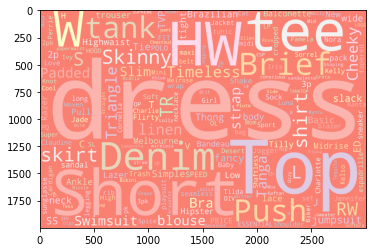

In [ ]:
cloud(text_primavera_producto)

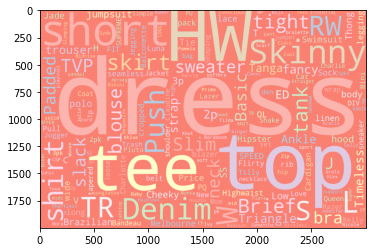

In [ ]:
cloud(text_verano_producto)

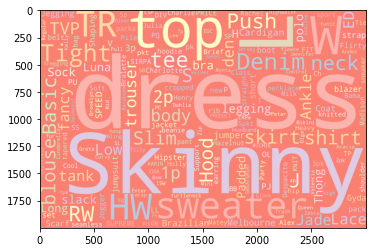

In [ ]:
cloud(text_otono_producto)

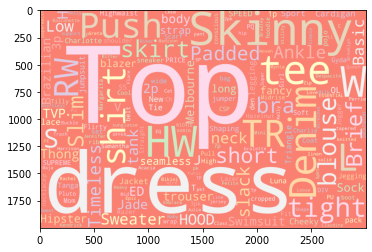

In [ ]:
cloud(text_invierno_producto)

In [ ]:
#Rearreglar ids
usuarios_unicos = clientes['customer_id'].unique().tolist()#
articulos_unicos = articulos['article_id'].unique().tolist()#

cliente_ids = dict(list(enumerate(usuarios_unicos)))
articulo_ids = dict(list(enumerate(articulos_unicos)))

mapa_cliente = {u: uidx for uidx, u in cliente_ids.items()}
mapa_articulo = {i: iidx for iidx, i in articulo_ids.items()}

trans['user_id'] = trans['customer_id'].map(mapa_cliente)
trans['item_id'] = trans['article_id'].map(mapa_articulo)

In [ ]:
#Jugar con fechas para mejorar performance...

#Todo el dataset

print(trans.shape)
print(trans['t_dat'].max())
print(trans['t_dat'].min())


# Entrenamiento 80% data, desde inicio 20-09-2018 hasta 28-04-2020 y validación 10%
trans_train=trans[trans.t_dat.between('2018-09-20','2020-04-28')]
print(trans_train['t_dat'].max())
print(trans_train['t_dat'].min())


# Test 10% data
trans_test=trans[trans.t_dat.between('2020-04-29','2020-09-22')]
print(trans_test['t_dat'].max())
print(trans_test['t_dat'].min())


#trans = trans[trans['t_dat'] > '2020-08-21']


(1318501, 8)
2020-09-22 00:00:00
2018-09-20 00:00:00
2020-04-28 00:00:00
2018-09-20 00:00:00
2020-09-22 00:00:00
2020-04-29 00:00:00


In [54]:
train=len(trans_train['user_id'].unique())
test=len(trans_test['user_id'].unique())
print(train)
print(test)


42913
14398


In [ ]:
trans

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,user_id,item_id
0,0,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,655265001,0.025407,2,5563,24828
1,1,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,537688014,0.050831,2,5563,6231
2,2,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,698877002,0.042356,2,5563,35798
3,3,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,382127027,0.032186,2,5563,1351
4,4,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,610776001,0.008458,2,5563,15373
...,...,...,...,...,...,...,...,...
1318496,1318496,2019-09-10,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,751478002,0.042356,2,10627,48957
1318497,1318497,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,750444005,0.059305,1,10627,48753
1318498,1318498,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,811198001,0.033881,1,10627,61396
1318499,1318499,2019-09-20,3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...,787880005,0.050831,1,10627,56719


In [56]:
#Crear matriz sparse

fila=trans_train['user_id'].values
columna=trans_train['item_id'].values
data=np.ones(trans_train.shape[0])

sparse= coo_matrix((data, (fila, columna)), shape=(len(usuarios_unicos), len(articulos_unicos)))

sparse


<45000x77650 sparse matrix of type '<class 'numpy.float64'>'
	with 1168624 stored elements in COOrdinate format>

In [58]:
#Probar que funciona modelo
model = implicit.als.AlternatingLeastSquares(factors=5, iterations=2)
model.fit(sparse)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04494023323059082 seconds
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

In [75]:
#Funciones a usar (df=trans)

def to_user_item_coo(trans):
    """ Turn a dataframe with transactions into a COO sparse items x users matrix"""
    fila = trans['user_id'].values
    col = trans['item_id'].values
    data = np.ones(trans.shape[0])
    sparse= coo_matrix((data, (fila, col)), shape=(len(usuarios_unicos), len(articulo_ids)))
    return sparse

def split_data(trans, validation_days=73):
    """ Split a pandas dataframe into training and validation data, using <<validation_days>>
    """
    validation_cut = trans['t_dat'].max() - pd.Timedelta(validation_days)

    df_train = trans[trans['t_dat'] < validation_cut]
    df_val = trans[trans['t_dat'] >= validation_cut]
    return df_train, df_val

def get_val_matrices(trans, validation_days=73):
    """ Split into training and validation and create various matrices
        
        Returns a dictionary with the following keys:
            coo_train: training data in COO sparse format and as (users x items)
            csr_train: training data in CSR sparse format and as (users x items)
            csr_val:  validation data in CSR sparse format and as (users x items)
    
    """
    df_train, df_val = split_data(trans, validation_days=validation_days)
    coo_train = to_user_item_coo(df_train)
    coo_val = to_user_item_coo(df_val)

    csr_train = coo_train.tocsr()
    csr_val = coo_val.tocsr()
    
    return {'coo_train': coo_train,
            'csr_train': csr_train,
            'csr_val': csr_val
          }


def validate(matrices, factors=200, iterations=20, regularization=0.01, show_progress=True):
    """ Train an ALS model with <<factors>> (embeddings dimension) 
    for <<iterations>> over matrices and validate with MAP@12
    """
    coo_train, csr_train, csr_val = matrices['coo_train'], matrices['csr_train'], matrices['csr_val']
    
    model = implicit.als.AlternatingLeastSquares(factors=factors, 
                                                 iterations=iterations, 
                                                 regularization=regularization, 
                                                 random_state=42)
    model.fit(coo_train, show_progress=show_progress)
    
    # The MAPK by implicit doesn't allow to calculate allowing repeated items, which is the case.
    # TODO: change MAP@10 to a library that allows repeated items in prediction
    map10 = mean_average_precision_at_k(model, csr_train, csr_val, K=10, show_progress=show_progress, num_threads=4)
    print(f"Factors: {factors:>3} - Iterations: {iterations:>2} - Regularization: {regularization:4.3f} ==> MAP@10: {map10:6.5f}")
    return map10




In [76]:
matrices = get_val_matrices(trans_train)

In [77]:
matrices

{'coo_train': <45000x77650 sparse matrix of type '<class 'numpy.float64'>'
 	with 1167534 stored elements in COOrdinate format>,
 'csr_train': <45000x77650 sparse matrix of type '<class 'numpy.float64'>'
 	with 998192 stored elements in Compressed Sparse Row format>,
 'csr_val': <45000x77650 sparse matrix of type '<class 'numpy.float64'>'
 	with 961 stored elements in Compressed Sparse Row format>}

In [79]:
%%time

from implicit.evaluation import mean_average_precision_at_k

best_map10 = 0
for factors in [10,20, 40, 50, 60, 70, 80,90, 100, 150, 200, 300]:
    for iterations in [20, 40, 80, 100]:
        for regularization in [0.01]:
            map10 = validate(matrices, factors, iterations, regularization, show_progress=False)
            if map10 > best_map10:
                best_map10 = map10
                best_params = {'factors': factors, 'iterations': iterations, 'regularization': regularization}
                print(f"Best MAP@12 found. Updating: {best_params}")

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04767155647277832 seconds
  warnings.warn(


Factors:  10 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00268
Best MAP@12 found. Updating: {'factors': 10, 'iterations': 20, 'regularization': 0.01}


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04323267936706543 seconds
  warnings.warn(


Factors:  10 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00239


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04220890998840332 seconds
  warnings.warn(


Factors:  10 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00281
Best MAP@12 found. Updating: {'factors': 10, 'iterations': 80, 'regularization': 0.01}


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04181647300720215 seconds
  warnings.warn(


Factors:  10 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00283
Best MAP@12 found. Updating: {'factors': 10, 'iterations': 100, 'regularization': 0.01}


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04131889343261719 seconds
  warnings.warn(


Factors:  20 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00249


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04190945625305176 seconds
  warnings.warn(


Factors:  20 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00331
Best MAP@12 found. Updating: {'factors': 20, 'iterations': 40, 'regularization': 0.01}


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04145956039428711 seconds
  warnings.warn(


Factors:  20 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00393
Best MAP@12 found. Updating: {'factors': 20, 'iterations': 80, 'regularization': 0.01}


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04177594184875488 seconds
  warnings.warn(


Factors:  20 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00393


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04157423973083496 seconds
  warnings.warn(


Factors:  40 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00259


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04773139953613281 seconds
  warnings.warn(


Factors:  40 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00278


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04100465774536133 seconds
  warnings.warn(


Factors:  40 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00265


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04233241081237793 seconds
  warnings.warn(


Factors:  40 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00250


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.042636871337890625 seconds
  warnings.warn(


Factors:  50 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00204


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04113125801086426 seconds
  warnings.warn(


Factors:  50 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00154


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04372763633728027 seconds
  warnings.warn(


Factors:  50 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00133


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04149889945983887 seconds
  warnings.warn(


Factors:  50 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00145


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0412747859954834 seconds
  warnings.warn(


Factors:  60 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00278


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04284071922302246 seconds
  warnings.warn(


Factors:  60 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00186


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04282999038696289 seconds
  warnings.warn(


Factors:  60 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00145


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04233074188232422 seconds
  warnings.warn(


Factors:  60 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00141


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04217791557312012 seconds
  warnings.warn(


Factors:  70 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00168


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04229402542114258 seconds
  warnings.warn(


Factors:  70 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00170


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04216957092285156 seconds
  warnings.warn(


Factors:  70 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00175


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.042159318923950195 seconds
  warnings.warn(


Factors:  70 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00175


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04140925407409668 seconds
  warnings.warn(


Factors:  80 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00125


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04175376892089844 seconds
  warnings.warn(


Factors:  80 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00145


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0450747013092041 seconds
  warnings.warn(


Factors:  80 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00137


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04313921928405762 seconds
  warnings.warn(


Factors:  80 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00137


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04128122329711914 seconds
  warnings.warn(


Factors:  90 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00132


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04154086112976074 seconds
  warnings.warn(


Factors:  90 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00170


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.048445940017700195 seconds
  warnings.warn(


Factors:  90 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00170


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.06056332588195801 seconds
  warnings.warn(


Factors:  90 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00169


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0412600040435791 seconds
  warnings.warn(


Factors: 100 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00106


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.041272640228271484 seconds
  warnings.warn(


Factors: 100 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00134


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04210782051086426 seconds
  warnings.warn(


Factors: 100 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00113


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0433506965637207 seconds
  warnings.warn(


Factors: 100 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00113


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04253864288330078 seconds
  warnings.warn(


Factors: 150 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00115


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04123067855834961 seconds
  warnings.warn(


Factors: 150 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00150


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04128742218017578 seconds
  warnings.warn(


Factors: 150 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00143


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04786944389343262 seconds
  warnings.warn(


Factors: 150 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00131


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04226326942443848 seconds
  warnings.warn(


Factors: 200 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00088


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04332256317138672 seconds
  warnings.warn(


Factors: 200 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00103


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.09646272659301758 seconds
  warnings.warn(


Factors: 200 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00102


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0422205924987793 seconds
  warnings.warn(


Factors: 200 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00102


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04135560989379883 seconds
  warnings.warn(


Factors: 300 - Iterations: 20 - Regularization: 0.010 ==> MAP@10: 0.00151


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04096555709838867 seconds
  warnings.warn(


Factors: 300 - Iterations: 40 - Regularization: 0.010 ==> MAP@10: 0.00172


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04364800453186035 seconds
  warnings.warn(


Factors: 300 - Iterations: 80 - Regularization: 0.010 ==> MAP@10: 0.00169


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.041181087493896484 seconds
  warnings.warn(


Factors: 300 - Iterations: 100 - Regularization: 0.010 ==> MAP@10: 0.00163
CPU times: user 2min 47s, sys: 647 ms, total: 2min 48s
Wall time: 2min 48s


In [80]:
# Entrenando sobre todo el dataset de train

coo_train = to_user_item_coo(trans_train)
csr_train = coo_train.tocsr()


def train(coo_train, factors=20, iterations=100, regularization=0.01, show_progress=True):
    model = implicit.als.AlternatingLeastSquares(factors=factors, 
                                                 iterations=iterations, 
                                                 regularization=regularization, 
                                                 random_state=42)
    model.fit(coo_train, show_progress=show_progress)
    return model




In [81]:
best_params

{'factors': 20, 'iterations': 80, 'regularization': 0.01}

In [82]:
modelo = train(coo_train, **best_params)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04818224906921387 seconds
  warnings.warn(


  0%|          | 0/80 [00:00<?, ?it/s]

In [83]:
# Se ejecutará modelo sobre test
coo_test = to_user_item_coo(trans_test)
csr_test = coo_test.tocsr()



In [84]:
def recomendacion(modelo, csr_test, reco_name="recos.csv"):
    preds = []
    batch_size = 2000
    to_generate = np.arange(len(usuarios_unicos))
    for startidx in range(0, len(to_generate), batch_size):
        batch = to_generate[startidx : startidx + batch_size]
        ids, scores = model.recommend(batch, csr_train[batch], N=12, filter_already_liked_items=False)
        for i, userid in enumerate(batch):
            customer_id = cliente_ids[userid]
            user_items = ids[i]
            article_ids = [articulo_ids[item_id] for item_id in user_items]
            preds.append((customer_id, ' '.join(article_ids)))

    df_preds = pd.DataFrame(preds, columns=['customer_id', 'prediction'])
    df_preds.to_csv(reco_name, index=False)
    
    display(df_preds.head())
    print(df_preds.shape)
    
    return df_preds

In [85]:
%%time
df_preds = recomendacion(modelo, csr_test);

,customer_id,prediction
0,000226b9ea81019249060b376b516f821a80e9b24f89a7...,156231001 610776002 759871002 111593001 158340...
1,000303d20b953d06dcf8c6db2d05616383a88ac84bf054...,190021021 190021003 190021001 189691075 189691...
2,0003e7b27d3dd2295e609bcc017e96a05f322cd25fdaa7...,160442007 399223001 158340001 561445005 160442...
3,000416152a81973bebab23142bd5dd6ebd85c8c5e2d63e...,706016002 372860001 706016001 610776002 706016...
4,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...,160442007 158340001 610776002 399223001 160442...


(45000, 2)
CPU times: user 1.31 s, sys: 11 ms, total: 1.32 s
Wall time: 1.32 s


In [70]:
df_preds.shape

(45000, 2)